# TRABAJO FINAL - DATA SCIENCE
MODELOS ANALITICOS para la  predicción de RANKING  de Jugadores de
Fútbol

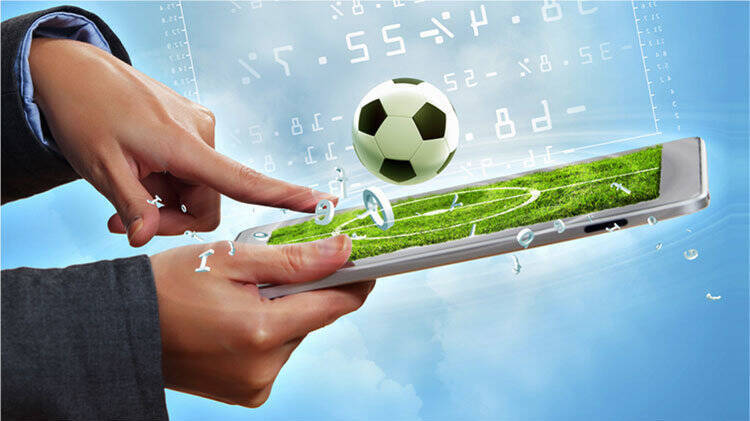


# PRESENTACION y CONTEXTO del  PROYECTO

El presente proyecto se enmarca en la utilización de un  dataset con el objetivo de analizar las distintas variables a los fines de la toma de decisiòn (ficticica)  de una instituciòn deportiva futbolìstica o empresarial en instancias de la compra de jugadores de futbol  en sus distintas posiciones de juego. Con el objetivo de optimizar la pre-selecciòn y selección, procederemos a analizar los datos mediante distintos diagramas, gràficos, visulaizaciones , resùmenes numèricos y predicciones para obtener una cantidad representativa de jugadores entre los cuales se decidirà finalmente la transacciòn.- Para ello se elegiràn una cierta cantidad de jugadores por posiciòn de juego, cierta cantidad de zurdos y diestros de pie, contratos que estàn finalizando o por finalizar a corto plazo.-Es sumamente importante para las empresas, clubes e instituciones obtener informaciòn general y especìfica de estas variables porque sabemos muy bien el impacto econòmico y deportivo que una buena elecciòn puede llegar a producir.



**Fuente del Dataset y de la Imagen**

Imagen = https://www.andresbenitez.org/      estadisticas-en-el-futbol-cuales-son-las-mejores-webs-de-analisis/

Dataset = https: //kaggle.com/code/mahmoudredagamil/football-players-stadistics/logjugadores_3120.csv

**Contexto Comercial**
Ante el incesante crecimiento mundial  de diversos aspectos relacionados al  fútbol, no solo a nivel deportivo sino también a nivel empresarial, es fundamental tener mayores herramientas, en este caso estadísticas, que nos simplifiquen o contribuyan a  la toma de decisiones en este ámbito.

**Contexto Analítico**
Esta base de datos contiene un historial con los jugadores (potenciales adquisiciones) con distintos atributos personales y  valoraciones de sus habilidades. La estructura de este análisis comienza con el  entendimiento del problema, extracción de datos, limpieza, EDA, selección de variables, modelamiento y  validación para el posterior despliegue del modelo.

**Definición de Objetivos**
El objetivo es desarrollar un Algoritmo de Machine Learning(ML) supervizado con problemas de regresión, para luego predecir el futuro una variable numérica (rating general) con valores de 0 a 100 (mayor puntuación).




**Hipótesis - Preguntas - Desafíos**

Uno de los desafíos es encontrar un valor porcentual  en "overall_rating" que nos marque una **base** a partir de la cual **pre-seleccionar** de un modo más rápido una cierta cantidad de jugadores. Luego  una selección de media instancia donde se involucrarán otras varialbles . En esa instancia media aparecerán algunas preguntas/hipòtesis : 1)Que a mayor edad mayor expreriencia y mejores resultados en el juego con menores errores en cuanto a sanciones . 2) Que a menor edad el aspecto fìsico, en su mayor explendor, nos ofrece mayores posibilidades de buenos resultados. 3) Que ser diestro implica mejores resultados para anotar goles. 4) Que la altura es esencial en el puesto de arquero.
Otro desafío será la selección  en el contexto de la ubicación en el campo de juego "Best_Position" de los jugadores, que al ser tan  variada es problable que se generen más preguntas a las cuales deberemos encontrar la respuesta más justa y acertiva posible: 1)La altura del arquero es lo más importante. 2)Un defensor debe ser robusto y de mayor peso.2)los jugadores mas caros son los delanteros 3) los jugadores que tienen mejor "Overal_ratting" serán los seleccionados.

Las respuestas a éstas preguntas e hipótesis estarán planteadas en relación a la variable "Overall_ratting" que nos marcará el nivel desde donde comenzaremos la pre-selección de jugadores.-

#BUSQUEDA y PROCESAMIENTO DE DATOS

  Carga y lectura de datos


In [91]:
#Librerías necesarias para el análisis y visulaización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt




In [92]:
#establecemos ruta de acceso
from google.colab import drive
drive.mount("/content/drive")
pathCurso="/content/drive/MyDrive/PF_SCIENCE/"
players_original = pd.read_csv(pathCurso+'players_3120.csv')
players_original.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


#ANALISIS del DATASET ORIGINAL


In [93]:
#Resumen del dataset original, muchas columnas de tipo categoricas deberan cambiar a numericas.
players_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      3120 non-null   object 
 1   Age                       3120 non-null   int64  
 2   Overall rating            3120 non-null   object 
 3   Potential                 3120 non-null   object 
 4   Team & Contract           3120 non-null   object 
 5   ID                        3120 non-null   int64  
 6   Height                    3120 non-null   object 
 7   Weight                    3120 non-null   object 
 8   foot                      3120 non-null   object 
 9   Best overall              3120 non-null   int64  
 10  Best position             3120 non-null   object 
 11  Growth                    3120 non-null   int64  
 12  Value                     3120 non-null   object 
 13  Wage                      3120 non-null   object 
 14  Release 

In [94]:
# Dimesniones filas, columnas del dataset original.
players_original.shape

(3120, 65)

In [95]:
players=pd.DataFrame(players_original)
players.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,14,1875,377,3,49,72,83,84,28,NaN
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,8,1651,351,1,72,54,61,70,44,NaN
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,6,1897,409,1,85,74,78,85,31,NaN
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,8,1644,353,1,72,50,59,66,52,NaN
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,10,1960,405,1,72,70,80,81,52,NaN


#DATA WRANGLING:LIMPIEZA y TRANSFORMACION del DATASET

In [96]:
#comenzamos depurar el dataset players.
players.drop(['Unnamed: 64'],axis=1,inplace=True)
players.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,6,14,1875,377,3,49,72,83,84,28
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,5,8,1651,351,1,72,54,61,70,44
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,10,6,1897,409,1,85,74,78,85,31
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,11,8,1644,353,1,72,50,59,66,52
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,14,10,1960,405,1,72,70,80,81,52


In [97]:
# corroboramos que no queden nulos
players.isnull().sum()


,0
name,0
Age,0
Overall rating,0
Potential,0
Team & Contract,0
...,...
Pace / Diving,0
Shooting / Handling,0
Passing / Kicking,0
Dribbling / Reflexes,0


In [98]:
#Separamos " Team & Contract" en  "Team", "Start_Contract", "End_Contract" a los fines de tener un solo tipo de dato en la columna
players[["Team", "Start_Contract", "End_Contract"]]=players["Team & Contract"].str.extract(r'([A-Za-z\s]+)\n(\d{4}) ~ (\d{4})')
players.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,377,3,49,72,83,84,28,taro,2014,2016
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,351,1,72,54,61,70,44,Ipswich Town,2022,2025
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,409,1,85,74,78,85,31,Real Madrid,2019,2027
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,353,1,72,50,59,66,52,Borussia Dortmund,2024,2028
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,405,1,72,70,80,81,52,Real Madrid,2023,2029


In [99]:
#Creamos columna nueva
#Extraemos de  "Height" solo el valor numerico de la altura "Height_cm" a los fines de tener un solo tipo de dato en la columna.
players["Height_cm"]=players["Height"].str.extract(r'(\d+)')[0]
players.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,3,49,72,83,84,28,taro,2014,2016,182
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,1,72,54,61,70,44,Ipswich Town,2022,2025,174
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,1,85,74,78,85,31,Real Madrid,2019,2027,170
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,1,72,50,59,66,52,Borussia Dortmund,2024,2028,178
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,1,72,70,80,81,52,Real Madrid,2023,2029,175


In [100]:
#Creamos otra columna nueva
#Extraemos de  "Weight" solo el valor numerico del peso "Weight_kg" a los fines de tener un solo tipo de dato en la columna.
players["Weight_kg"]=players["Weight"].str.extract(r'(\d+)')[0]
players.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
0,15 Ronaldinho CAM ST,34,78,78,Querétaro\n2014 ~ 2016,28130,"182cm / 6'0""",76kg / 168lbs,Right,77,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Ipswich Town\n2022 ~ 2025,260145,"174cm / 5'9""",65kg / 143lbs,Left,67,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Real Madrid\n2019 ~ 2027,231410,"170cm / 5'7""",68kg / 150lbs,Right,84,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Borussia Dortmund\n2024 ~ 2028,70728,"178cm / 5'10""",72kg / 159lbs,Right,65,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Real Madrid\n2023 ~ 2029,264309,"175cm / 5'9""",70kg / 154lbs,Left,79,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [101]:
#Eliminamos columnas que no utilizaremos porque ya se reemplazaron y ese Id no nos interesa.
players=players.drop(columns=["Height","Weight","Team & Contract","ID",])
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,€4.1M,€45K,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,€1.8M,€3K,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,€43.5M,€145K,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,€1M,€900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,€22M,€41K,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [102]:
#Reemplazamos simbolo "€" por espacio a los fines dejar solo el numero en "Value".
players["Value"]=players["Value"].str.replace("€", " ")
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4.1M,€45K,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1.8M,€3K,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43.5M,€145K,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1M,€900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22M,€41K,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [103]:
#Reemplazamos simbolo "€" por espacio a los fines dejar solo el numero en "Value".
players["Wage"]=players["Wage"].str.replace("€", " ")
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4.1M,45K,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1.8M,3K,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43.5M,145K,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1M,900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22M,41K,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [104]:
# al modificar algunas columnas surgieron datos nulos .
players.isnull().sum()

,0
name,0
Age,0
Overall rating,0
Potential,0
foot,0
...,...
Team,518
Start_Contract,518
End_Contract,518
Height_cm,0


In [105]:
#Decidimos rellenar los nulos para mayor prolijidad, en donde 2050 seran los contratos  desconocidos, pero no podemos eliminarlos porque nos sacarian muchos jugadores del análisis.-
players["Team"].fillna("Unknown", inplace=True)
players["Start_Contract"].fillna("2050", inplace=True)
players["End_Contract"].fillna("2050", inplace=True)

In [106]:
players.isnull().sum()

,0
name,0
Age,0
Overall rating,0
Potential,0
foot,0
...,...
Team,0
Start_Contract,0
End_Contract,0
Height_cm,0


In [107]:
# Podemos darle el nombre "ID" al index
players.index.name='ID'




In [108]:
#Se exterae la referencia K de miles
players["Wage"]=players["Wage"].str.extract(r'(\d+)')[0]
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4.1M,45,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1.8M,3,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43.5M,145,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1M,900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22M,41,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [109]:
#Se exterae la referencia K de miles
players["Value"]=players["Value"].str.extract(r'(\d+)')[0]
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4,45,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1,3,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43,145,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1,900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22,41,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [110]:
#Se controlaron todas las columnas para descartar las que no utilizaremos en primer término.
#players_20_40=players.iloc[ : , 10:30]
#players_30_50=players.iloc[ : , 30:50]
players_50_61=players.iloc[ : , 50:]


players_50_61.head()




,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,
0,6,14,1875,377,3,49,72,83,84,28,taro,2014,2016,182,76
1,5,8,1651,351,1,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,10,6,1897,409,1,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,11,8,1644,353,1,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,14,10,1960,405,1,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [111]:
#Se decide eliminar la columna cláusula de recisión, ya que no es de interés erogar dinero en ese aspecto.
players=players.drop(columns=['Release clause'])
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4,45,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1,3,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43,145,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1,900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22,41,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [112]:
#Se decide eliminar mas columnas debido a que corresponde a otro parametros la calificacion y trataremos que esten en los rangos de 0 a 100
players=players.drop(columns=['Total attacking','Total skill','Total movement','Total power','Total mentality','Total stats','Base stats','International reputation'])
players.head()

,name,Age,Overall rating,Potential,foot,Best overall,Best position,Growth,Value,Wage,...,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,
0,15 Ronaldinho CAM ST,34,78,78,Right,77,CAM,0,4,45,...,49,72,83,84,28,taro,2014,2016,182,76
1,O. Hutchinson RM CAM,19,65,81,Left,67,CAM,16,1,3,...,72,54,61,70,44,Ipswich Town,2022,2025,174,65
2,Brahim CAM,23,82,86,Right,84,CAM,4,43,145,...,85,74,78,85,31,Real Madrid,2019,2027,170,68
3,K. Wätjen CM,17,62,80,Right,65,CAM,18,1,900,...,72,50,59,66,52,Borussia Dortmund,2024,2028,178,72
4,A. Güler CAM RM,18,77,88,Left,79,CAM,11,22,41,...,72,70,80,81,52,Real Madrid,2023,2029,175,70


In [113]:
#al querer modificar dtypes aparecieron varios errores a resolver
players.columns = players.columns.str.replace(' ', '_')  # Reemplaza espacios por guiones bajos
players.columns = players.columns.str.replace('.', '')  # reemplazo puntos
players.columns = players.columns.str.replace('/', '')  #reemplazo barra

In [114]:
#mas errores en cuanto a los valores.
unique_values = players['Overall_rating'].unique()
print(unique_values)

['78' '65' '82' '62' '77' '74' '88' '83+1' '79+2' '66' '70' '80+1' '76'
 '82+1' '73' '87' '72' '89' '81' '75' '80' '77+1' '90' '86' '83' '84'
 '81+1' '91' '79' '64' '79-1' '68+1' '80+2' '78+1' '67' '79+1' '85' '88-1'
 '76+1' '68' '77-1' '69' '78-1' '61' '75+1' '71' '74+1' '71+3' '73+1' '63'
 '73+2' '86+1' '80-1' '71+1' '70+1' '66+2' '66+1' '67+1' '73-1' '75-1'
 '86-1' '76+2' '59' '82-1' '67-1' '72+1' '76-2' '82-2' '60' '60+1' '64+2'
 '58' '75+2' '69+1' '69+2' '74-1' '77+2' '57' '74+2' '71+2' '71-1' '75-2'
 '47' '56' '60+2' '68+2' '64+1' '68-2' '83-1' '76-1' '74-2' '72+2' '66-1'
 '65+1' '72-1' '65+2' '70-1' '62+1' '54' '55' '52' '59+2' '61+2' '65-1'
 '53' '69-1' '56+2' '50']


In [115]:
#importamos esta librería para buscar estos valores
import re


In [116]:
# Definimos una función para procesar los valores erroneos
def procesamos_errores(value):
    # Buscamos el número base y el valor adicional
    match = re.match(r'(\d+)([+-]\d+)', value)
    if match:
        base_number = int(match.group(1))
        additional_value = int(match.group(2))
        return base_number + additional_value
    else:
        return value  # Si no se encuentra un patrón válido, deja el valor sin cambios
# Aplica la función a la columna 'Overall_rating'
players['Overall_rating'] = players['Overall_rating'].apply(procesamos_errores)


In [117]:
#verificamos que los valores erróneos se corrigieron
unique_values = players['Overall_rating'].unique()
print(unique_values)

['78' '65' '82' '62' '77' '74' '88' 84 81 '66' '70' '76' 83 '73' '87' '72'
 '89' '81' '75' '80' 78 '90' '86' '83' '84' 82 '91' '79' '64' 69 79 '67'
 80 '85' 87 77 '68' 76 '69' '61' '71' 75 74 '63' 72 71 68 67 85 '59' 66 73
 '60' 61 '58' 70 '57' '47' '56' 62 65 63 '54' '55' '52' 64 '53' 58 '50']


In [118]:
# Pero al detectar  mas errores en otras columnas averiguaremos cuales columnas contienen una expresión como '80+2' o '80-2'
def expresiones_erroneas(value):
    return re.search(r'[+-]\d+', str(value)) is not None

# Itera sobre las columnas
columnas_problematicas = []
for column in players.columns:
    if players[column].apply(expresiones_erroneas).any():
        columnas_problematicas.append(column)

# Imprimimos las columnas problemáticas
print("Columnas con valores problemáticos:")
for col in columnas_problematicas:
    print(col)

Columnas con valores problemáticos:
Potential
Crossing
Finishing
Heading_accuracy
Short_passing
Volleys
Dribbling
Curve
FK_Accuracy
Long_passing
Ball_control
Acceleration
Sprint_speed
Agility
Reactions
Balance
Shot_power
Jumping
Stamina
Strength
Long_shots
Aggression
Interceptions
Att_Position
Vision
Penalties
Composure
Defensive_awareness
Standing_tackle
Sliding_tackle
GK_Diving
GK_Handling
GK_Kicking
GK_Positioning
GK_Reflexes


In [119]:

# Definimos una función para procesar los valores erróneos
def deteccion_errores(value):
    # Busca el número base y el valor adicional
    match = re.match(r'(\d+)([+-]\d+)', str(value))
    if match:
        base_number = int(match.group(1))
        additional_value = int(match.group(2))
        return base_number + additional_value
    else:
        return value  # Si no se encuentra un patrón válido, deja el valor sin cambios

# Itera sobre las columnas problemáticas
for column in columnas_problematicas:
    players[column] = players[column].apply(deteccion_errores)



In [120]:
#ejemplo de corroboracion en una colummna al azar
unique_values = players['GK_Handling'].unique()
print(unique_values)

['14' '7' '9' '13' '10' '16' '8' '11' '6' '12' '5' '15' '71' 80 '72' '89'
 '84' '77' '69' '4' '25' '81' '80' '85' '82' '58' '73' '76' '74' '70' '75'
 '65' '78' 72 '3' 79 '64' 57 '56' '63' 75 '79' '87' '2' '90' '62' '68'
 '66' '83' '60' 66 '21' '61' 54 64 '59' '67' '50' '57' 69 '55']


In [121]:
#cambiamos el dtype de algunas columnas.
players=players.astype({'Age':'int16', 'Overall_rating':'int16', 'Potential':'int16','Best_overall':'int16', 'Growth':'int16', 'Value':'int16', 'Wage':'int16', 'Crossing':'int16', 'Finishing':'int16', 'Heading_accuracy':'int16', 'Short_passing':'int16', 'Volleys':'int16', 'Dribbling':'int16', 'Curve':'int16', 'FK_Accuracy':'int16', 'Long_passing':'int16', 'Ball_control':'int16', 'Acceleration':'int16', 'Sprint_speed':'int16', 'Agility':'int16', 'Reactions':'int16', 'Balance':'int16', 'Shot_power':'int16', 'Jumping':'int16', 'Stamina':'int16', 'Strength':'int16', 'Long_shots':'int16', 'Aggression':'int16', 'Interceptions':'int16', 'Att_Position':'int16', 'Vision':'int16', 'Penalties':'int16', 'Composure':'int16', 'Total_defending':'int16', 'Defensive_awareness':'int16', 'Standing_tackle':'int16', 'Sliding_tackle':'int16', 'Total_goalkeeping':'int16', 'GK_Diving':'int16', 'GK_Handling':'int16', 'GK_Kicking':'int16', 'GK_Positioning':'int16', 'GK_Reflexes':'int16', 'Pace__Diving':'int16', 'Shooting__Handling':'int16', 'Passing__Kicking':'int16', 'Dribbling__Reflexes':'int16', 'Defending__Pace':'int16','Height_cm':'int16', 'Weight_kg':'int16'})

In [122]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3120 non-null   object
 1   Age                  3120 non-null   int16 
 2   Overall_rating       3120 non-null   int16 
 3   Potential            3120 non-null   int16 
 4   foot                 3120 non-null   object
 5   Best_overall         3120 non-null   int16 
 6   Best_position        3120 non-null   object
 7   Growth               3120 non-null   int16 
 8   Value                3120 non-null   int16 
 9   Wage                 3120 non-null   int16 
 10  Crossing             3120 non-null   int16 
 11  Finishing            3120 non-null   int16 
 12  Heading_accuracy     3120 non-null   int16 
 13  Short_passing        3120 non-null   int16 
 14  Volleys              3120 non-null   int16 
 15  Dribbling            3120 non-null   int16 
 16  Curve 

In [123]:
players['Start_Contract'] = pd.to_datetime(players['Start_Contract'])
players['End_Contract'] = pd.to_datetime(players['End_Contract'])

In [124]:
#borramos duplicados en nombres
players.drop_duplicates(subset='name', inplace=True)



#ANALISIS del DATASET FINAL "players"


In [125]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2746 entries, 0 to 3111
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 2746 non-null   object        
 1   Age                  2746 non-null   int16         
 2   Overall_rating       2746 non-null   int16         
 3   Potential            2746 non-null   int16         
 4   foot                 2746 non-null   object        
 5   Best_overall         2746 non-null   int16         
 6   Best_position        2746 non-null   object        
 7   Growth               2746 non-null   int16         
 8   Value                2746 non-null   int16         
 9   Wage                 2746 non-null   int16         
 10  Crossing             2746 non-null   int16         
 11  Finishing            2746 non-null   int16         
 12  Heading_accuracy     2746 non-null   int16         
 13  Short_passing        2746 non-null   i

In [126]:
#Muestra aleatoria
players.sample(6)

,name,Age,Overall_rating,Potential,foot,Best_overall,Best_position,Growth,Value,Wage,...,Pace__Diving,Shooting__Handling,Passing__Kicking,Dribbling__Reflexes,Defending__Pace,Team,Start_Contract,End_Contract,Height_cm,Weight_kg
ID,,,,,,,,,,,,,,,,,,,,,
2445,H. Abdelli CAM CM LM,23,71,73,Right,73,CAM,3,2,5,...,67,66,68,71,59,Angers SCO,2022-01-01,2026-01-01,185,81
3080,J. Hopkins CAM CM,19,56,74,Right,59,RM,18,375,800,...,65,38,55,58,38,DC United,2022-01-01,2025-01-01,188,74
1728,O. Diakité ST,19,71,81,Right,73,ST,10,4,10,...,79,70,57,70,21,Stade de Reims,2023-01-01,2028-01-01,182,75
1143,J. Shelvey CM CDM,31,75,75,Right,75,CM,0,4,53,...,37,69,80,71,62,Unknown,2050-01-01,2050-01-01,184,80
572,B. Traoré CDM CM,21,72,82,Right,72,CDM,10,4,23,...,71,53,68,70,66,Wolverhampton Wanderers,2023-01-01,2027-01-01,183,67
191,B. Šeško ST,20,77,86,Right,79,ST,9,23,39,...,83,76,61,75,43,RB Leipzig,2023-01-01,2028-01-01,195,85


In [127]:
#Mostramos la forma del dataset
players.shape

(2746, 56)

In [128]:
#Detallamos las columnas
players.columns

Index(['name', 'Age', 'Overall_rating', 'Potential', 'foot', 'Best_overall',
       'Best_position', 'Growth', 'Value', 'Wage', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve',
       'FK_Accuracy', 'Long_passing', 'Ball_control', 'Acceleration',
       'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_Position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Pace__Diving',
       'Shooting__Handling', 'Passing__Kicking', 'Dribbling__Reflexes',
       'Defending__Pace', 'Team', 'Start_Contract', 'End_Contract',
       'Height_cm', 'Weight_kg'],
      dtype='object')

Podemos ver que el marco de datos,  luego de su proceso de limpieza,   contiene 56 columnas y 2746 filas.-

**Descripción de las Variables**

name=nombre del jugador

Age= edad

Overall_rating=calificación gral *

Potential=puntuacion potencial del jugador *

foot=pie izquierdo/derecho

Best_overall= mejor puntuacion *

Best_position= posición en el campo de juego [CAM(medio campo ofensivo central, ST(striker delantero centro)
, LWB(left win extremo izquierdo), CB(center back defensor ctral.), CM(center midfield centro campista defensivo, RM(right midfielder mediocampista derecho), CDM(center defensive midfield centro campista defensivo), LM(left midfield centro campista izquierdo), RB(lateral derecho), RWB(right win back defensor mediocampista derecho) , LB(lateral izquierdo defensor ), LW(left win extremo izquierdo atacar), GK(arquero portero, CF(centrodelantero), RW(right winger extremo derecho)

Growth=crecimiento

Value=valor en millones

Wage=salario en miles

Crossing= tiros al centro

Finishing= goles

Heading_accuracy= punteria

Short_passing= pases cortos

Volleys = voleas

Dribbling= habilidad para desplazarse

Curve= efecto en la pelota

FK_Accuracy= exactitud tiros libres

Long_passing=pases largos

Ball_control=control de la pelota

Acceleration=aceleracion pique

Sprint_speed= alta velocidad carrera

Agility= agilidad

Reactions=reaccion

Balance=equilibrio

Shot_power=potencia disparo

Jumping=salto

Stamina=resistencia

Strength=fuerza

Long_shots=tiros lejanos

Aggression= agresion faltas

Interceptions=interceptar pases

Att_Position=posicion ataque

Vision=comprender juego

Penalties =penales

Composure= calma tranquilidad control emocional

Total_defending=total defendido

Defensive_awareness=conciencia defensiva

Standing_tackle=tacle defensivo parado

Sliding_tackle=tacle defensivo deslizado

Total_goalkeeping= total arquero atajados

GK_Diving=atajadas arquero

GK_Handling=manejo de las manos arquero

GK_Kicking= patadas  arquero

GK_Positioning=posicionamiento arquero

GK_Reflexes=reflejos

Pace__Diving= ritmo rapidez velocidad

Shooting__Handling=entrega de tiro arquero

Passing__Kicking=patadas pase arquero

Dribbling__Reflexes=reflejo habilidad * combinacion variables repetida

Defending__Pace=ritmo de defensa

Team =equipo

Start_Contract= inicio contrato

End_Contract= fin contrato

Height_cm= altura en cm

Weight_kg= peso en kg


In [129]:
#Obtenemos una descripción estadíastica
players.describe()

,Age,Overall_rating,Potential,Best_overall,Growth,Value,Wage,Crossing,Finishing,Heading_accuracy,...,GK_Reflexes,Pace__Diving,Shooting__Handling,Passing__Kicking,Dribbling__Reflexes,Defending__Pace,Start_Contract,End_Contract,Height_cm,Weight_kg
count,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,...,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746.000000,2746,2746,2746.000000,2746.000000
mean,24.183540,73.151493,79.027677,74.273853,5.909687,63.768390,68.201384,58.374363,55.771304,57.783685,...,14.500728,72.903496,61.380918,65.891479,71.403132,54.742535,2026-02-01 09:33:10.094682880,2029-12-17 18:19:08.434086144,181.859068,75.032775
min,16.000000,47.000000,54.000000,49.000000,0.000000,0.000000,0.000000,9.000000,3.000000,5.000000,...,2.000000,29.000000,21.000000,31.000000,34.000000,16.000000,1993-01-01 00:00:00,2012-01-01 00:00:00,161.000000,53.000000
25%,20.000000,69.000000,76.000000,70.000000,0.000000,2.000000,8.000000,50.000000,43.000000,49.000000,...,8.000000,67.000000,53.000000,60.000000,66.000000,38.000000,2021-01-01 00:00:00,2025-01-01 00:00:00,177.000000,70.000000
50%,23.000000,74.000000,80.000000,75.000000,5.000000,7.000000,22.000000,63.000000,61.000000,60.000000,...,10.000000,74.000000,64.000000,67.000000,72.000000,58.000000,2022-01-01 00:00:00,2026-01-01 00:00:00,182.000000,75.000000
75%,27.000000,78.000000,82.000000,79.000000,10.000000,20.000000,50.000000,71.000000,71.000000,70.000000,...,13.000000,80.000000,72.000000,73.000000,77.000000,70.000000,2023-01-01 00:00:00,2028-01-01 00:00:00,187.000000,80.000000
max,44.000000,91.000000,94.000000,93.000000,25.000000,975.000000,950.000000,95.000000,96.000000,93.000000,...,93.000000,97.000000,93.000000,94.000000,94.000000,89.000000,2050-01-01 00:00:00,2050-01-01 00:00:00,206.000000,103.000000
std,4.840084,6.612319,4.958696,6.412194,5.716738,182.644483,149.290535,17.665513,20.072168,17.194457,...,16.676920,10.336971,14.014533,9.617979,8.562398,18.117879,NaN,NaN,7.002640,7.297005


Con esta descripción  tenemos diferentes resultados estadísticos a saber: cantidad total de jugadores, promedios en todas las variables, mínimos y máximos, valores en 1er, 2do y 3er cuartiles.-

In [130]:
players.describe(include='object')

,name,foot,Best_position,Team
count,2746,2746,2746,2746
unique,2746,2,15,423
top,15 Ronaldinho CAM ST,Right,CAM,Unknown
freq,1,1990,541,465


En este resumen de datos cualitativos observamos cantidad de datos únicos de cada variable.  El top apuntará hacia el objetivo de calificación?.

# EXPLORATORY DATA ANALYSIS -EDA (Análisis  Exploratorios de Datos)



In [131]:
#Elegimos um estilo sobrio, elegante
mpl.style.use('seaborn')

<ipython-input-131-26b892746b98>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


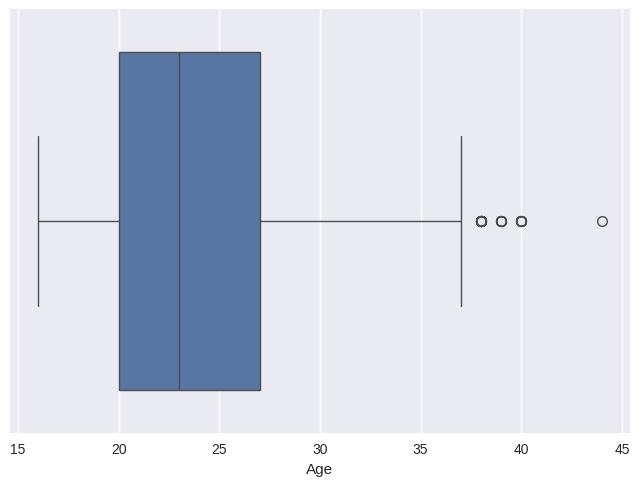

In [132]:
#Análisis Univariado: comenzamos con gráfico  para detectar ouliers en edades.
ax=sns.boxplot(x=players['Age'])

En este gráfico de caja observamos algunos valores de outliers en las edades de los jugadores, pero no vamos a descartarlos por su potencial importancia en el campo de juego relacionado a su experiencia.Los distintos cuartiles nos marcan los límites etarios por cuartil.-

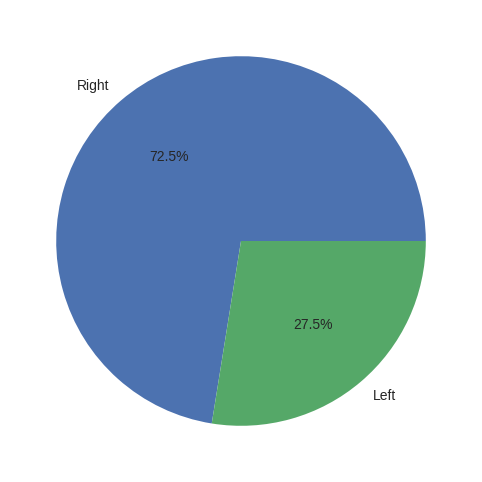

In [133]:
#Gráfico  Piechart para ver porcentajes de players por dominio de pie.
dominio_pie = players['foot'].value_counts()

fig,ax = plt.subplots(figsize =(12, 6))#tamaño de la figura
ax.pie(dominio_pie, labels = dominio_pie.index, autopct='%1.1f%%')#como saldra el valor porcentaje
plt.show()


Observamos un predominio en  cantidades de diestros ( 72.5% ), contra 27.5% de zurdos. Corroboraremos con los resultados finales lo que popularmente se conoce  en cuanto a las mayores habilidades de los zurdos que compensaría esa diferencia ?.-

<Axes: xlabel='foot', ylabel='Count'>

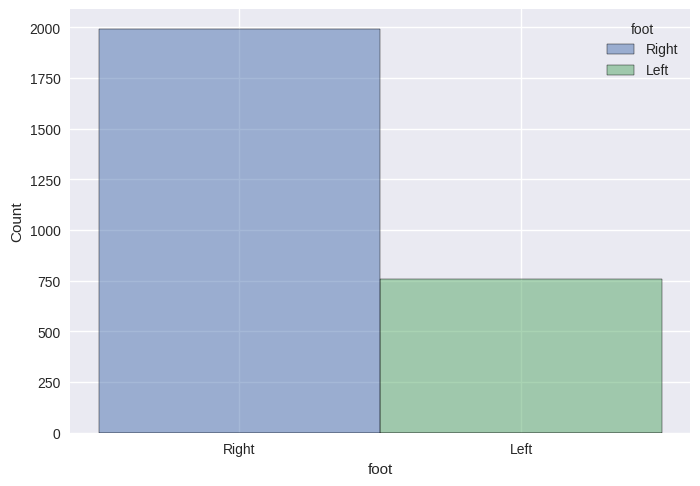

In [134]:
#gráfico que   indica la cantidad de jugadores por dominio de pie.
sns.histplot(players, x='foot', hue='foot')

Tenemos en este gráfico visualmente 750 jugadores zurdos contra 2000 diestros.-

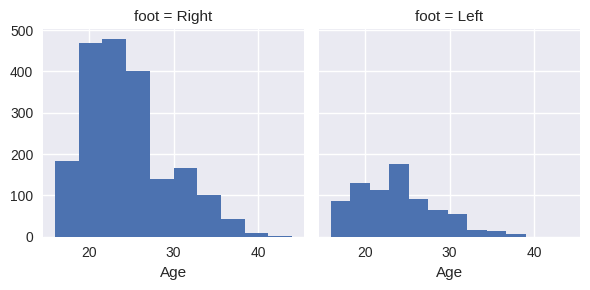

In [135]:
#Análisis bivariado: comparamos edades agrupando por dominio de pie
g = sns.FacetGrid(players, col="foot")
g.map(plt.hist, "Age")

En esta figura vemos que hay una oferta mayor en los zurdos de 25 años, pero lo evaluaremos con los resultados finales de su combinacion con  habilidades. Entre los diestros tenemos una mayor oferta en el rango de 20 a 22 años.-Tambien relacionaremos con el resultado de sus habilidades.-

Text(0.5, 0, 'Edad')

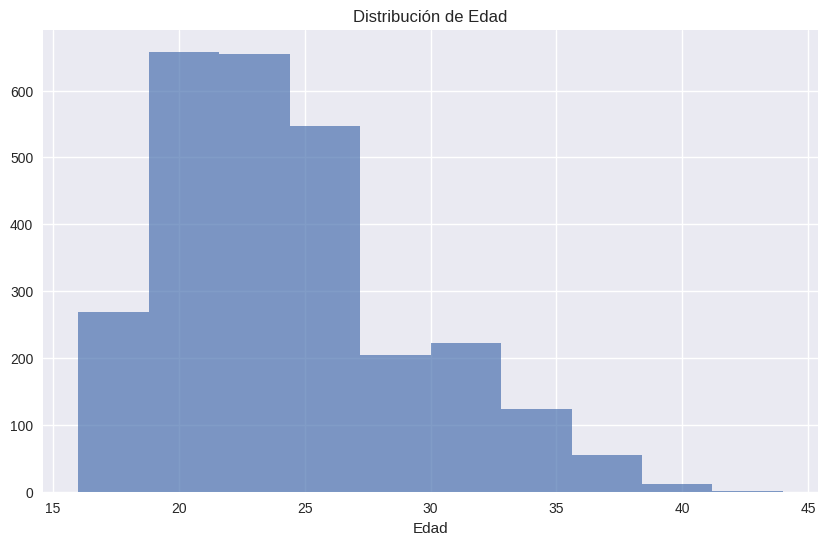

In [136]:
#Gráfico de distribución de la edad.
fig, ax=plt.subplots(figsize=(10, 6))
ax.hist(players.Age, bins=10, alpha=0.7)
ax.set_title('Distribución de Edad')
ax.set_xlabel('Edad')


Observamos una distribución normal levemente con asimetría a la derecha pero no es muy relevante. Tenemos un promedio de  jugadores con 18 años y con 24 años.- Pero estamos buscando elegir una combinacion entre juventud, experiencia y habilidades.

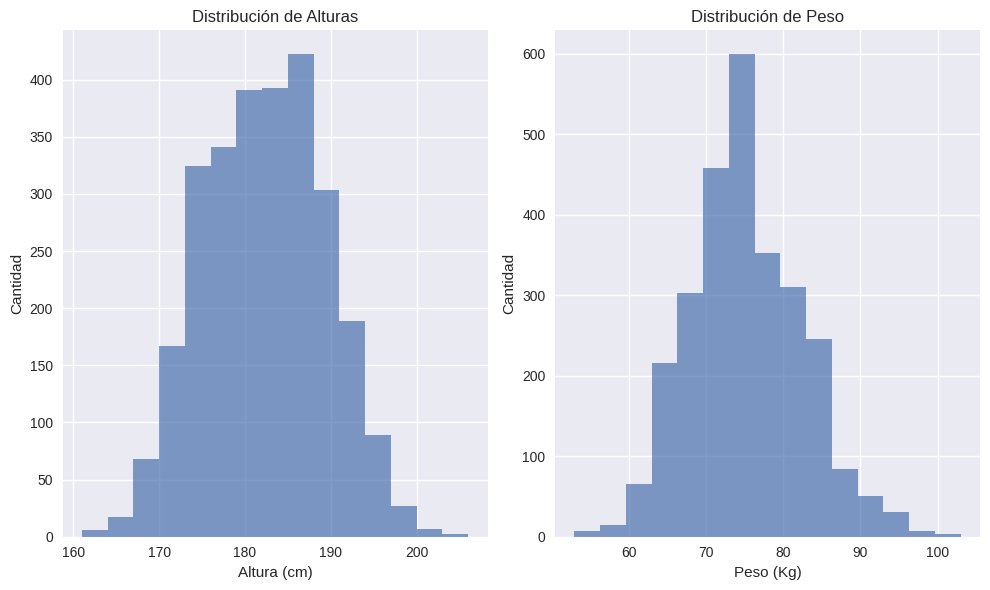

In [137]:
#comparamos distribución de alturas y pesos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Gráfico 1: Histograma de alturas (variable Height_cm)
ax1.hist(players.Height_cm, bins=15, alpha=0.7)
ax1.set_title('Distribución de Alturas')
ax1.set_xlabel('Altura (cm)')
ax1.set_ylabel('Cantidad')

# Gráfico 2: Histograma con pesos (variable Weight_kg)
ax2.hist(players.Weight_kg, bins=15, alpha=0.7)
ax2.set_title('Distribución de Peso')
ax2.set_xlabel('Peso (Kg)')
ax2.set_ylabel('Cantidad')


# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Las distribuciones en altura y pesos son normales.Luego podremos relacionar la altura en referencia al lugar que ocupa en el campo. Por ej arquero . Y en referencia al peso tenemos cuestiones como agilidad, rapidez, destreza, movilidad en una persona con exceso de peso probablemente tengas resultados en la valoracion inferiores al resto.-  

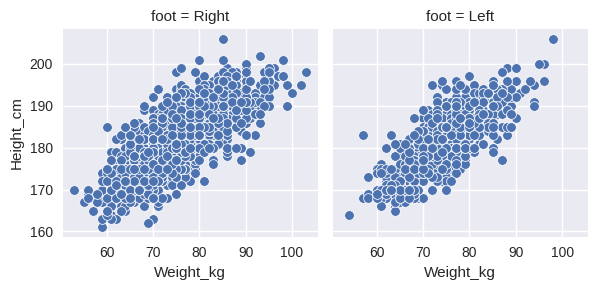

In [138]:
# En esta figura de dos gráficos relacionamos pesos con alturas.
bivariado=sns.FacetGrid(players, col="foot")
bivariado.map_dataframe(sns.scatterplot, x="Weight_kg", y= "Height_cm")
bivariado.add_legend()

Nos entrega información acerca de las correlaciones de las variables peso y altura. En este caso presentada en forma lineal ascendente, a mayor altura mayor peso.Los valores de correlación serán cercanos a 1.
Se ve mas marcada la correlación entre los jugadores zurdos.-

<Axes: xlabel='Value', ylabel='Age'>

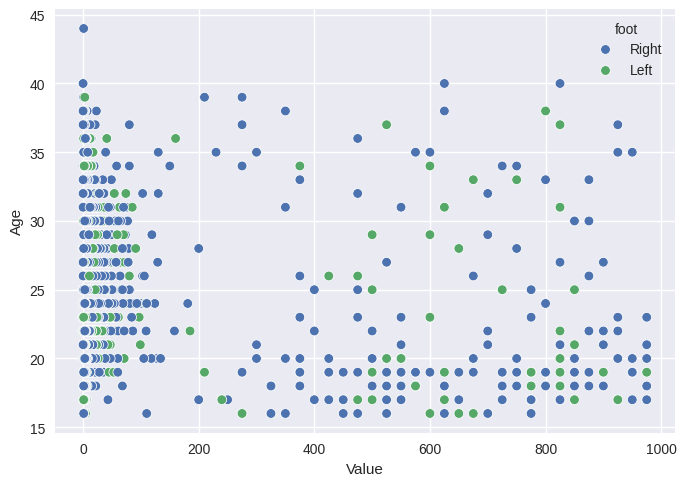

In [139]:
#En este gráfico de puntos relacionamos valor (millones) con edades.
sns.scatterplot(data=players, x='Value', y='Age',hue='foot')

Nos muestra una falta de relación entre las variables ya que adopta una vista uniforme.Al momento de seleccionar jugadores el valor no tiene que ver con la edad, serán otros los parámetros para valorarlos evidentemente.- Tampoco influye la comparación con manejo del pie.-

<Figure size 800x500 with 0 Axes>

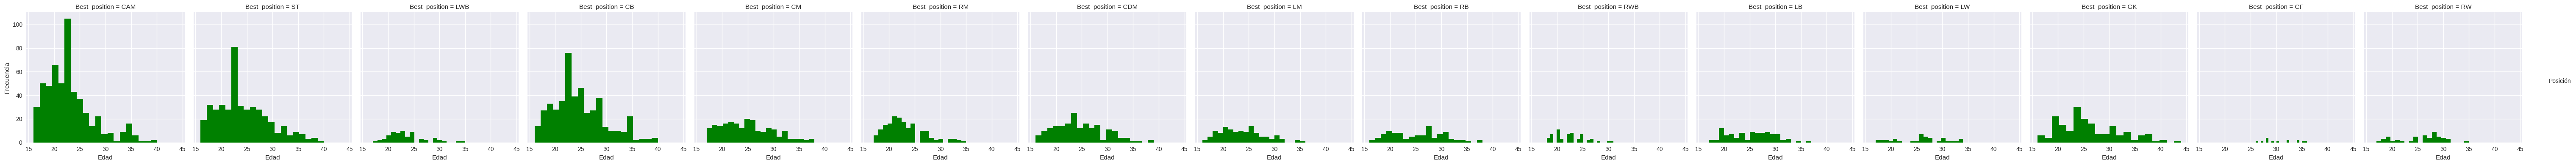

In [140]:
#analizamos cantidades por edades y por  puestos de juego en el campo.
plt.figure(figsize=(8, 5))
g = sns.FacetGrid(players, col="Best_position", height=4)
g.map(plt.hist, "Age",color="green",bins=20)
g.set_axis_labels("Edad", "Frecuencia")
g.add_legend(title="Posición")

Nos permite ver claramente que oferta tenemos por tipo de posición en el campo de juego. Claramente tenemos mas jugadores en CAM, ST, CB y donde menos oferta tenemos es en CF, RWB, RB, LM, RWB. Esto nos limita a la hora de seleccionar porque la oferta va a ser menor y deberemos elegir entre una cantidad menor de jugadores.-

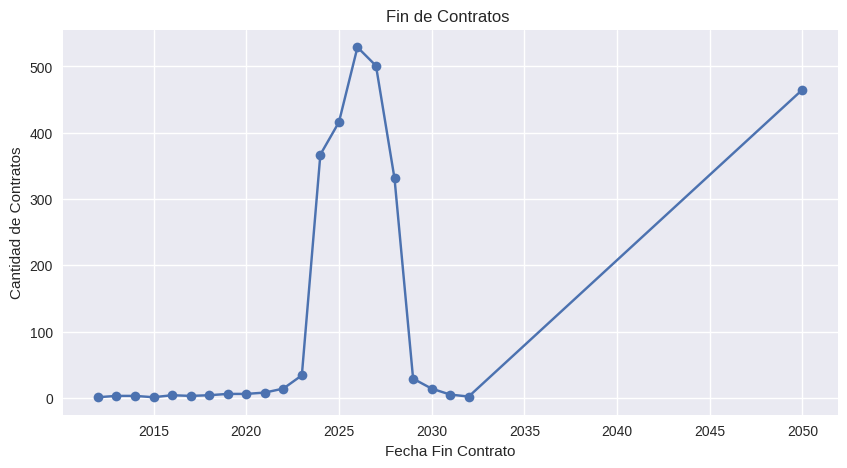

In [141]:
#Creamos un dataframe para contar fin de contratos por año
contract_counts = players.groupby('End_Contract').size().reset_index(name='Cantidad de Contratos')
# Creamos gráficos de lineas
plt.figure(figsize=(10, 5))
plt.plot(contract_counts['End_Contract'], contract_counts['Cantidad de Contratos'], marker='o', linestyle='-')
plt.xlabel('Fecha Fin Contrato')
plt.ylabel('Cantidad de Contratos')
plt.title('Fin de Contratos ')
plt.show()


En este gráfico de líneas del tiempo observamos que la mayoria de contratos están por vencer entre los años 2024 y 2027 por lo cual es un buen momento para efectuar las predicciones . Sabemos que el año 2050 es el  dato que utilizamos para rellenar en los datos nulos, tan solo para no eliminarlos y ubicarlo bien en el gráfico.-

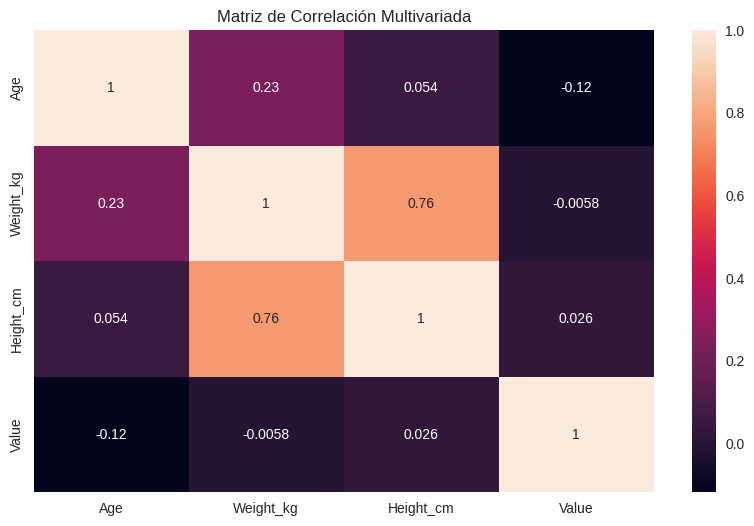

In [142]:
#Análisis multivariado entre edad, peso, altura y valor del jugador
plt.figure(figsize=(10, 6))
correlation_matrix = players[["Age","Weight_kg","Height_cm","Value"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación Multivariada')
plt.show()

Nos confirma nuevamente que la única correlación entre variables tiene que ver con la altura y el peso de cada jugador.-

CONCLUSION EDA
Encontramos variables que se vinculan en forma directa con las cuales podremos realizar más análisis por ej. relación altura/peso,



#Métodos y Técnicas de conversión y selección de features ( Feature Selection)


Procederemos a utilizar   LabelEncoder que  es una técnica  para convertir  las categorías de una columna en números enteros únicos, de forma tal que pueda mejorar el rendimiento de los algoritmos de ML.Se utiliza un método propio de selección y luego con RandomForestClassifier   para reducir la dimensionalidad.




In [143]:
#Empezamos a llevar todo el dataset a numérico  Aplicando LabelEncoder
from sklearn.preprocessing import LabelEncoder



In [144]:
#preparamos para usar metodos fit y transform
label_encoder = LabelEncoder()
#probamos label encoding en columna foot
players['foot_codificado'] = label_encoder.fit_transform(players['foot'])

print(players[['foot', 'foot_codificado']].head())

     foot  foot_codificado
ID                        
0   Right                1
1    Left                0
2   Right                1
3   Right                1
4    Left                0


Se creo una variable con código 1 para Right y 2 para Left.

In [145]:
#repetimos el proceso en columna best position
label_encoder = LabelEncoder()

players['Best_position_codificado'] = label_encoder.fit_transform(players['Best_position'])
players[['Best_position', 'Best_position_codificado']].tail()

,Best_position,Best_position_codificado
ID,,
3107,CAM,0
3108,RM,11
3109,CAM,0
3110,CM,4
3111,LB,6


Se creó una variable con códigos en 'Best_position_codificado' desde 0 a 14 con las 15 posiciones en el campo.


In [146]:
#Indicamos una Lista de columnas a eliminar porque no ser numéricas, por ser redundante, por ser la variable objetivo y por reducción de dimensionalidad.
x=players.drop(['Team', 'Start_Contract','Wage', 'End_Contract', 'foot', 'Best_overall', 'Best_position', 'Overall_rating', 'name'],axis=1)
y=players['Overall_rating']
x.columns

Index(['Age', 'Potential', 'Growth', 'Value', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Dribbling', 'Curve',
       'FK_Accuracy', 'Long_passing', 'Ball_control', 'Acceleration',
       'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_Position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Pace__Diving',
       'Shooting__Handling', 'Passing__Kicking', 'Dribbling__Reflexes',
       'Defending__Pace', 'Height_cm', 'Weight_kg', 'foot_codificado',
       'Best_position_codificado'],
      dtype='object')

Observamos el resultado de las columnas con selección propia.



In [147]:
#Importamos librerías para  reducción de dimensionalidad con técnica   Random Forest Classifier(por importancia de la feature).
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [148]:
#Entrenamos el modelo random forest con las mejores características de las variables
x=players.drop(['Team', 'Start_Contract','Wage', 'End_Contract', 'foot', 'Best_overall', 'Best_position', 'Overall_rating', 'name'],axis=1)
y=players['Overall_rating']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

RandomForestClassifier(random_state=42)

In [149]:
#Seleccionamos las características mas importantes
selector = SelectFromModel(rf, threshold='mean', prefit=True)
x_reduced = selector.transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [150]:
#Vemos  las características seleccionadas:
feature_seleccion = x.columns[(selector.get_support())]
print("Características seleccionadas:", feature_seleccion)
feature_seleccion.shape


Características seleccionadas: Index(['Age', 'Potential', 'Growth', 'Value', 'Short_passing', 'Ball_control',
       'Reactions', 'Att_Position', 'Composure', 'Total_defending',
       'Shooting__Handling', 'Dribbling__Reflexes', 'Defending__Pace'],
      dtype='object')


(13,)

Concluímos con un dataset con una reducción considerable de variables para poder trabajar mejor con los algoritmos.-

In [151]:
# Definimos las features seleccionadas
columnas = ['Age', 'Potential', 'Growth', 'Value', 'Short_passing', 'Ball_control',
       'Reactions', 'Att_Position', 'Composure', 'Total_defending',
       'Shooting__Handling', 'Dribbling__Reflexes', 'Defending__Pace']
# Crear el nuevo DataFrame con solo las features seleccionadas
players_seleccion = players.loc[:, columnas]
# Mostrar el nuevo DataFrame
print(players_seleccion.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2746 entries, 0 to 3111
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  2746 non-null   int16
 1   Potential            2746 non-null   int16
 2   Growth               2746 non-null   int16
 3   Value                2746 non-null   int16
 4   Short_passing        2746 non-null   int16
 5   Ball_control         2746 non-null   int16
 6   Reactions            2746 non-null   int16
 7   Att_Position         2746 non-null   int16
 8   Composure            2746 non-null   int16
 9   Total_defending      2746 non-null   int16
 10  Shooting__Handling   2746 non-null   int16
 11  Dribbling__Reflexes  2746 non-null   int16
 12  Defending__Pace      2746 non-null   int16
dtypes: int16(13)
memory usage: 91.2 KB
None


Nos muestra un dataframe reducido de 2746 rows y  13 variables de tipo numéricas.

#MODELOS ANALITICOS y EVALUACION

 Los modelos de Regresión que utilizaremos en este caso son  métodos para determinar la relación estadística entre variable dependiente y/o una o mas variables independientes.
 Utilizaremos en este Proyecto los siguientes modelos de ML:LinearRegression,DecisionTreeRegressor y Regresión de Mínimos Cuadrados Ordinarios (OLS).
Sabemos que nos quedan muchos modelos por aplicar, que se podrán implementar en instancias posteriores ( por ej.SUPPORT VECTOR MACHINE SVM, lightGBM QDA,  XGBOOST XGB, lasso y elasticnet).

Evaluaremos  mediante métricas específicas luego del fit (entrenamiento) tales como  R2 (coeficiente de determinacion), MSE (error cuadratico medio) y otros,  que se  llevarán a cabo en el conjunto de datos de prueba (reservado 20% ).






In [152]:
#Librerías que utilizaremos para implementar los modelos de Regresión
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [153]:
#Definimos las variables x, y
x=players_seleccion
y=players['Overall_rating']

In [154]:
x

,Age,Potential,Growth,Value,Short_passing,Ball_control,Reactions,Att_Position,Composure,Total_defending,Shooting__Handling,Dribbling__Reflexes,Defending__Pace
ID,,,,,,,,,,,,,
0,34,78,0,4,82,90,70,66,0,78,72,84,28
1,19,81,16,1,66,68,61,60,63,140,54,70,44
2,23,86,4,43,83,85,79,78,79,84,74,85,31
3,17,80,18,1,67,66,59,54,49,161,50,66,52
4,18,88,11,22,81,81,69,68,77,155,70,81,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,25,74,1,3,66,76,69,73,75,82,70,78,26
3108,24,75,3,3,72,72,66,72,67,180,66,73,61
3109,20,83,13,3,72,75,70,66,66,167,63,74,56


In [155]:
y

,Overall_rating
ID,
0,78
1,65
2,82
3,62
4,77
...,...
3107,73
3108,72
3109,70


In [156]:
#División de datos en conjuntos de entrenamiento y prueba con 20% y 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [157]:
#1)instanciamos, determinamos  el modelo lineal de regresión y entrenamos
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

La regresion lineal utiliza el método de minimos cuadrados que mejor se ajusten a la recta.

In [158]:
# Realizamos  predicciones con los datos  de prueba
y_pred = model.predict(x_test)
# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)



print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

Error cuadrático medio (MSE): 0.12657276296392964
Coeficiente de determinación (R^2): 0.9968827389442249
RMSE: 0.35577066062834584
MAE: 0.11289598871820253


-Con 20% de test y 80% de fit

Error cuadrático medio (MSE): 0.12657276296392964
Coeficiente de determinación (R^2): 0.9968827389442249
RMSE: 0.35577066062834584
MAE: 0.11289598871820253


-Con 30% de test y 70% de fit

Error cuadrático medio (MSE): 0.10650058749453009
Coeficiente de determinación (R^2): 0.9973691993024384
RMSE: 0.32634427755750534
MAE: 0.10457119650965924



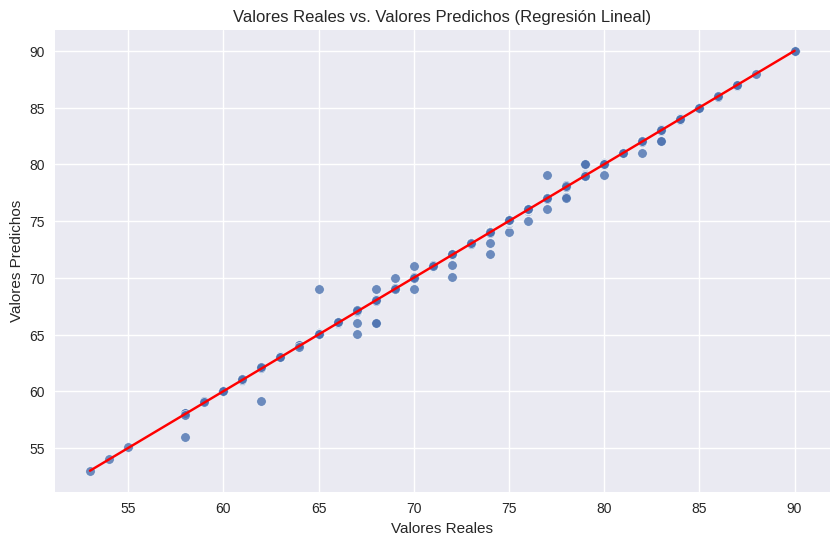

In [159]:
# Gráficamos valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Regresión Lineal)')
plt.show()

In [160]:
#2)determinamos,  ajustamos el modelo de árbol de decisión y entrenamos.
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [161]:
#Realizamos predicciones
y_pred_tree = decision_tree.predict(x_test)

#Evaluamos  el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")


DecisionTreeRegressor:
Error Cuadrático Medio (MSE): 1.5418181818181818
Coeficiente de Determinación (R^2): 0.9620277723206722


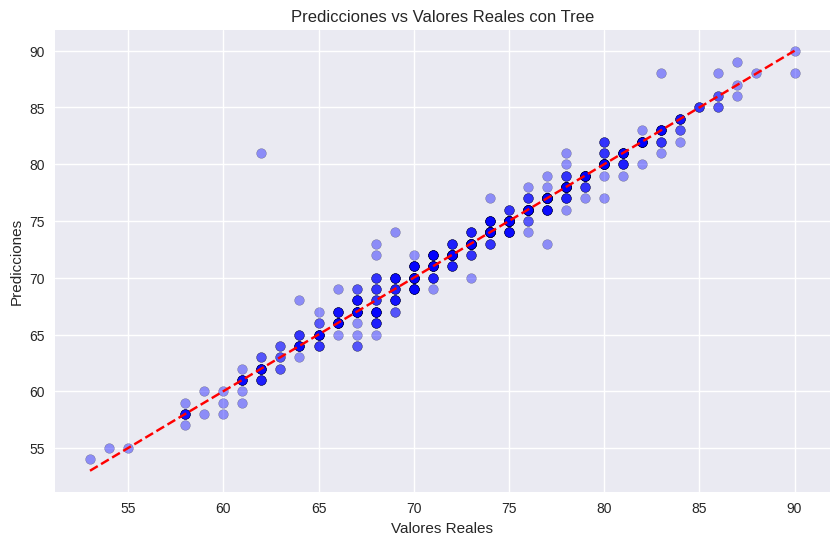

In [162]:
# Graficar las predicciones vs los valores reales en el (arbol de regresión)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', edgecolor='k', alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales con Tree')
plt.show()

Observamos que los puntos de las predicciones están cerca de la  línea de mínimos y máximos de los valores del test en una situación ideal, lo cual indica  que el modelo está prediciendo bien salvo esos dos puntos aislados.

In [163]:
#3)Aplicamos el  modelo de Regresión de Mínimos Cuadrados Ordinarios (OLS)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.004e+05
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:45:46   Log-Likelihood:                -610.37
No. Observations:                2746   AIC:                             1249.
Df Residuals:                    2732   BIC:                             1332.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6547    

-Pruebas de significancia: 1)la prueba t  evalúa si cada coeficiente de las variables independientes es diferente de cero. 2)los coeficientes Beta nos indican, por cada unidad adicional  en cada variable, cuantas unidades   aumenta o reduce el Overall_rating.
3)el intervalo de confianza es igual  que el pvalue.Los límites del intervalo de confianza  indican el rango dentro del cual se espera que se encuentren los coeficientes verdaderos del modelo con un 95% de confianza.Algunos resultados  no son significativos (p > 0.05), como Value, Short_passing, Ball_control, etc.
4)El valor del intercepto: 0.6547 es el valor de la variable dependiente  Overall_rating (65%).
 5)En el coeficiente de determinación(R2) buscamos que el valor sea lo mas alto posible. Representa el porcentaje de variabilidad de los datos  con valores entre 0 y 1  o 0% a 100%.

In [164]:
#Probaremos con esta libreria mas opciones de modelos estadísticos
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [165]:
#recordamos las variables independientes y dependiente
x=players_seleccion
y=players['Overall_rating']



#VALIDACION del MODELO

Utilizamos métodos para evaluar la optimización del modelo,  en donde se refleje su capacidad de adaptación para realizar predicciones precisas  con nuevos datos que no haya visto antes(Train-Test Split).

La técnica más común es la validación cruzada (cross-validation), donde el conjunto de datos se divide en múltiples subconjuntos (folds) de entrenamiento y se validan en los restantes. Repite el proceso varias veces para asegurar que el modelo no esté sobreajustado (overfitting) o infraajustado (underfitting).



In [166]:
#Importamos las librerias que nos faltan (LinearRegression y np ya las importamos antes)
from sklearn.model_selection import cross_val_score





In [167]:
#V1)Reccreamos el modelo con un nuevo nombre
model_2 = LinearRegression()

# Realizamos la validación cruzada
scores_1 = cross_val_score(model_2, x, y, cv=5, scoring='r2')

#Imprimimos los resultados
print("Scores de validación cruzada:", scores_1)
print("Media de los scores:", np.mean(scores_1))

Scores de validación cruzada: [0.99627022 0.99821408 0.99592808 0.99709017 0.99882236]
Media de los scores: 0.997264983438815


In [168]:
#V2)Recreamos el modelo de árbol de decisión y entrenamos.
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(x_train, y_train)
#Realizamos predicciones
y_pred_tree = decision_tree.predict(x_test)

#Evaluamos  el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
#Realizamos validación cruzada
scores_2 = cross_val_score(decision_tree , x, y, cv=5, scoring='r2')

#Imprimimos los resultados
print("Scores de validación cruzada:", scores_2)
print("Media de los scores:", np.mean(scores_2))

Scores de validación cruzada: [0.90834738 0.96840232 0.95710411 0.9549395  0.89318885]
Media de los scores: 0.9363964304259265


**Conclusiones sobre la Validación**

Los valores obtenidos en esta  validación cruzada (cross-validation) representan las puntuaciones del coeficiente de determinación ( R2 ) para cada una de las 5 divisiones (folds) efectuadas en  los modelos probados 1) y 2):
1)Scores de validación cruzada:  [0.99627022, 0.99821408, 0.99592808, 0.99709017, 0.99882236]. Media de los scores: 0.997264983438815
2)Scores de validación cruzada: [0.9048156  0.96770659 0.9608575  0.96273742 0.87744212]
Media de los scores: 0.934711845911521

Indican el ajuste al modelo y en resumen, los valores altos de R2 indican que ambos modelos están funcionando muy bien.


# CONCLUSION sobre MODELADO y METRICAS


Se probaron 3 modelos de regresión con muy buenos resultados en todos:

1) LinearRegression: Error cuadrático medio (MSE)= 0.12657276296392964
Coeficiente de determinación **(R^2)= 0.9968827389442249**
RMSE= 0.35577066062834584
MAE= 0.11289598871820253

2)DecisionTreeRegressor:
Error Cuadrático Medio (MSE)= 1.5418181818181818
Coeficiente de Determinación **(R^2)= 0.9620277723206722**

3)Mínimos Cuadrados Ordinarios (OLS):** R-squared= 0.998**


Razón por la cual debimos descartar un resultado por Sobreajuste (Overfitting) que  ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, capturando tanto los patrones reales como el ruido.
Para ello realizamos dos Validaciones con resultados excelentes lo que nos dejó la certeza de que   los modelos tienen un buen rendimiento en general con  los datos de entrenamiento y validación.
El  valor  **promedio** de las puntuaciones ( R^2 ) de las 5 particiones en cada  la validación son  **V1=0.99**, V2=0.93.
Si bien los 3 modelos tienen un alto valor de R2, pudimos validar solo el 1) y el 2).  Comparamos ambos (validados) y concluimos que  el método  que mejor se ajusta a la estructura del dataset final es el de **LinearRegression**, que explica el  **99%** (**0.9968**) de eficacia.

En cuanto al **error cuadrático (MSE)** de **0.1265** es relativamente bajo, lo que indica que las predicciones del  modelo están bastante cerca de los valores reales, sugiere que el modelo tiene un buen desempeño. El hecho de que el Coeficiente de Determinación (R²) sea 0.99 también respalda que el modelo está capturando bien la variabilidad de los datos, lo que refuerza la idea de que el modelo es preciso.

En las pruebas de significancia "t" los coeficiente son  distintos de cero, descartando una  hipótesis nula .

Los valores p (P>|t|) de cada variable nos indican la significancia estadística de cada coeficiente: “Potential” y “Growth” tienen valores p muy bajos, lo que sugiere que son predictores significativos.

Por último  el **intercepto** de  **0.6547**, nos indica que si  las variables independientes fueran cero, el valor esperado de “Overall_rating” sería 0.6547.





# Sugerencias - Predicciones


Sugerimos ahondar en la exploración de datos que hayan quedado fuera del modelo, creación de nuevas relaciones y considerar simultáneamente  a la **predicción de RANKING de Jugadores de Fútbol**,  relaciones que se desarrollaron en el EDA, como lo fuera edad, peso, dominio de pie, valor. Todo esto en conjunto nos dará el equilibrio perfecto al momento de la elección de cada jugador , con el "Overall_rating" **predicho**, combinado con la necesidad del empresario o club comprador en cuanto a la cantidad y puesto de los jugadores.
